In [1]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

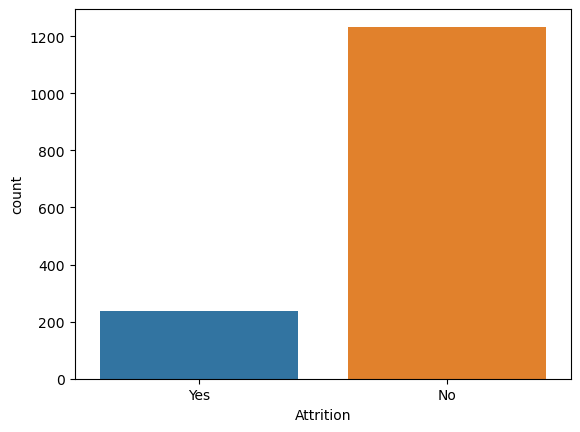

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Attrition', data=df)
plt.show()


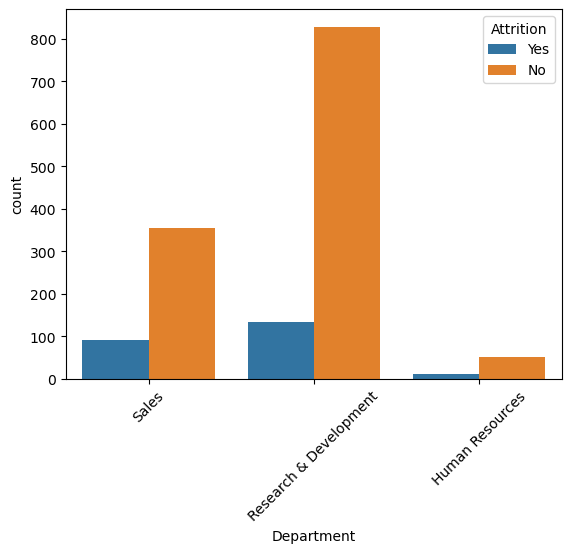

In [4]:
sns.countplot(x='Department', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.show()


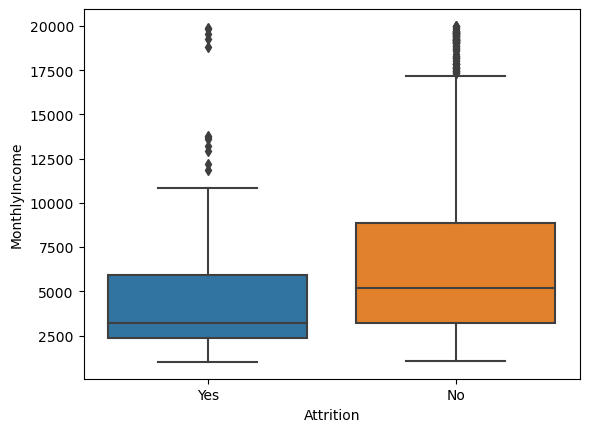

In [5]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.show()


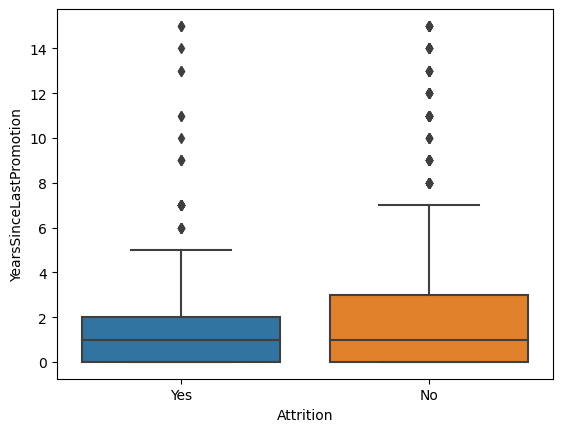

In [6]:
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df)
plt.show()


In [7]:
df2 = df.copy()
df2 = pd.get_dummies(df2, drop_first=True)


In [8]:
from sklearn.model_selection import train_test_split

X = df2.drop('Attrition_Yes', axis=1)
y = df2['Attrition_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


C:\Users\Pallavi H S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)


C:\Users\Pallavi H S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [11]:
model = LogisticRegression(max_iter=2000, solver='liblinear')
model.fit(X_train, y_train)


LogisticRegression(max_iter=2000, solver='liblinear')

In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
model = LogisticRegression(max_iter=2000, solver='liblinear')
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=2000, solver='liblinear')

In [15]:
y_pred = model.predict(X_test_scaled)


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8809523809523809
Confusion Matrix:
 [[241  14]
 [ 21  18]]


In [19]:
import sys
print(sys.executable)


C:\Users\Pallavi H S\anaconda3\python.exe


In [20]:
import shap


In [21]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model._logistic.LogisticRegression'>

In [22]:
import shap

# Create a small sample background data (SHAP recommends using 50 samples for speed)
background = X_train.sample(50, random_state=42)

# Create Kernel SHAP explainer for Logistic Regression
explainer = shap.KernelExplainer(model.predict_proba, background)

# Calculate SHAP values for test data
shap_values = explainer.shap_values(X_test.sample(20, random_state=42))  # small sample to avoid slowness

# Summary plot
shap.summary_plot(shap_values[1], X_test.sample(20, random_state=42))


  0%|          | 0/20 [00:00<?, ?it/s]

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [23]:
import shap


In [24]:
sample_X = X_train.sample(50, random_state=42)


In [25]:
explainer = shap.KernelExplainer(model.predict_proba, sample_X)


In [26]:
shap_values = explainer.shap_values(X_test.sample(20, random_state=42))


  0%|          | 0/20 [00:00<?, ?it/s]

In [49]:
import shap


In [50]:
background = X_train.sample(50, random_state=42)


In [51]:
explainer = shap.KernelExplainer(model.predict_proba, background)


In [52]:
test_sample = X_test.sample(20, random_state=42)


In [53]:
shap_values = explainer.shap_values(test_sample)


  0%|          | 0/20 [00:00<?, ?it/s]

In [54]:
sv = shap_values[1][:, :-1]


In [55]:
shap.summary_plot(sv, test_sample)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [56]:
import shap

# Create explainer for logistic regression
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")

# Compute SHAP values for test data
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


ValueError: The option feature_dependence has been renamed to feature_perturbation!

In [57]:
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\Pallavi H S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

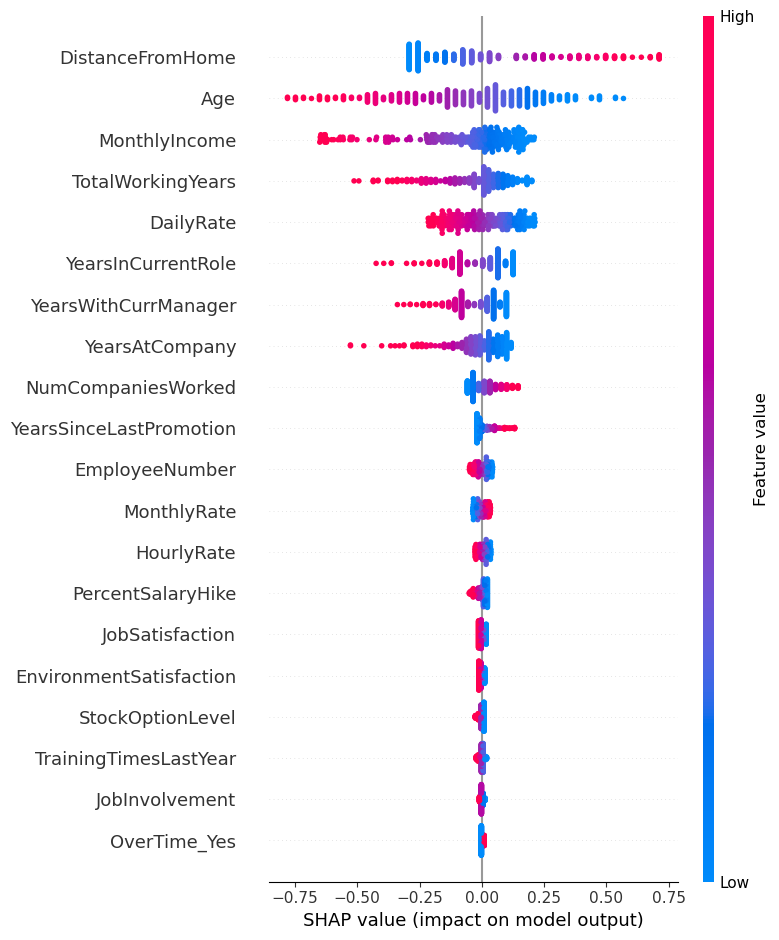

In [58]:
import shap

# 1. Create explainer (auto-selects right method)
explainer = shap.Explainer(model, X_train)

# 2. Compute SHAP values for test data
shap_values = explainer(X_test)

# 3. Summary plot
shap.summary_plot(shap_values.values, X_test, plot_type="dot")


In [ ]:
# SHAP Interpretation
The SHAP summary plot shows the impact of each feature on the model's predictions.
Features with higher SHAP values have a stronger influence on whether a customer churns or not.
Red color = higher feature value, Blue color = lower feature value.

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8673469387755102
[[255   0]
 [ 39   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



C:\Users\Pallavi H S\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pallavi H S\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pallavi H S\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(class_weight='balanced', max_iter=2000)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))


Accuracy: 0.717687074829932
[[187  68]
 [ 15  24]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       255
           1       0.26      0.62      0.37        39

    accuracy                           0.72       294
   macro avg       0.59      0.67      0.59       294
weighted avg       0.84      0.72      0.76       294



C:\Users\Pallavi H S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


C:\Users\Pallavi H S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [64]:
model = LogisticRegression()


In [65]:
model = LogisticRegression(max_iter=2000)


In [66]:
model.fit(X_train, y_train)


C:\Users\Pallavi H S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [69]:
model = LogisticRegression(max_iter=10000, solver='lbfgs')


In [70]:
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=10000)

In [71]:
y_pred = model.predict(X_test_scaled)


In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8843537414965986
[[242  13]
 [ 21  18]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.58      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.75      0.71      0.72       294
weighted avg       0.88      0.88      0.88       294



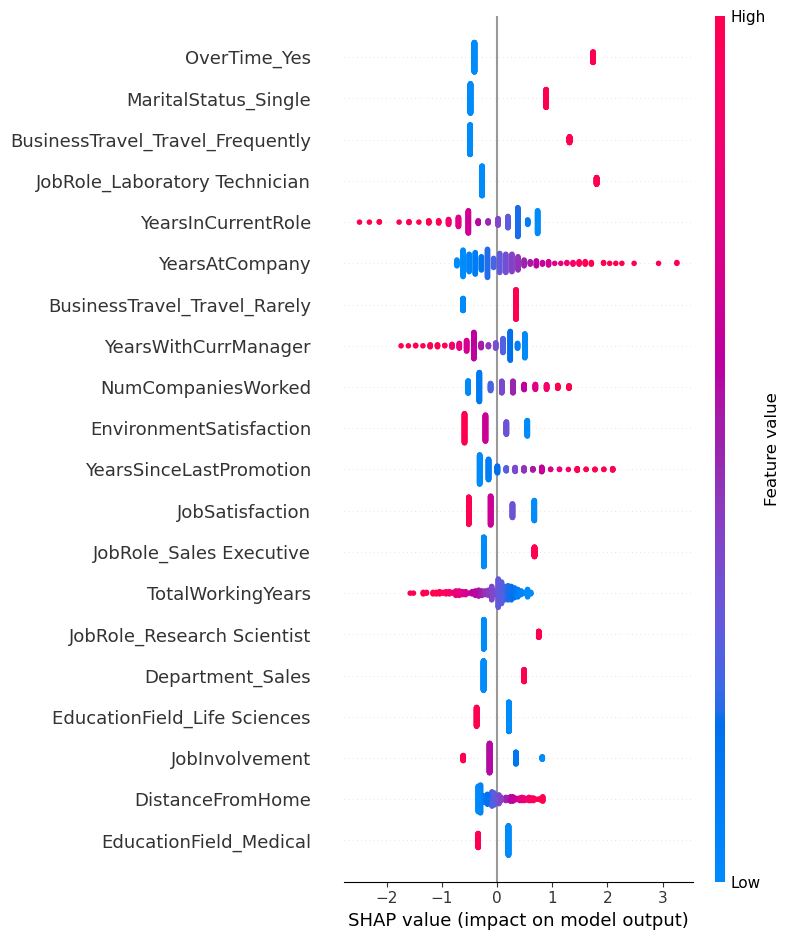

In [73]:
import shap
import numpy as np

explainer = shap.LinearExplainer(model, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


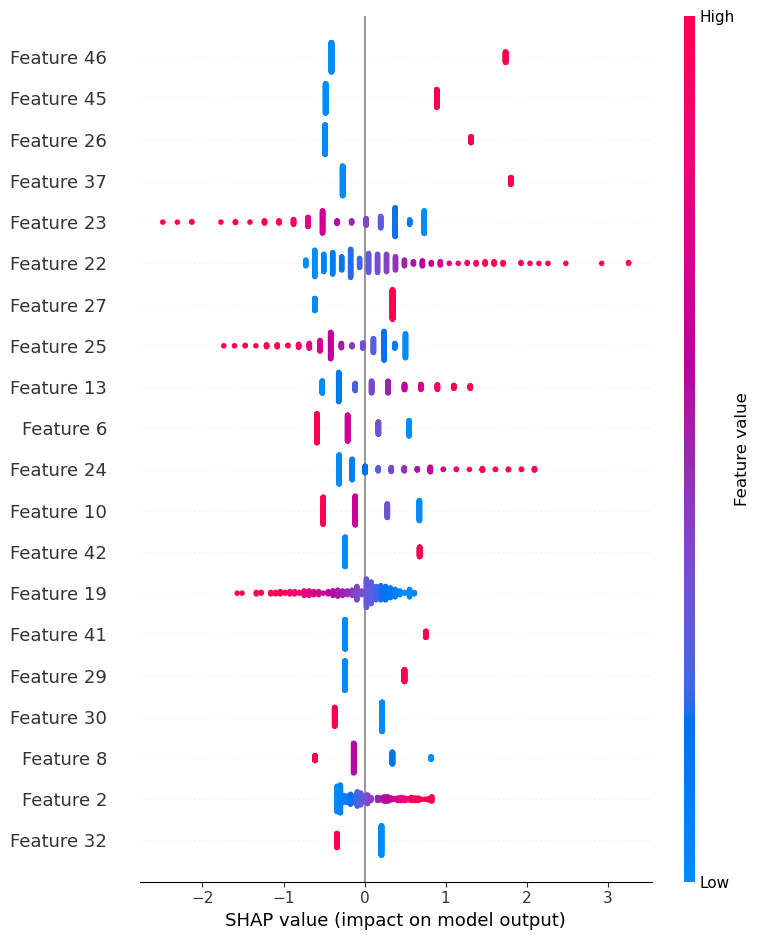

In [74]:
shap.summary_plot(shap_values, X_test_scaled)


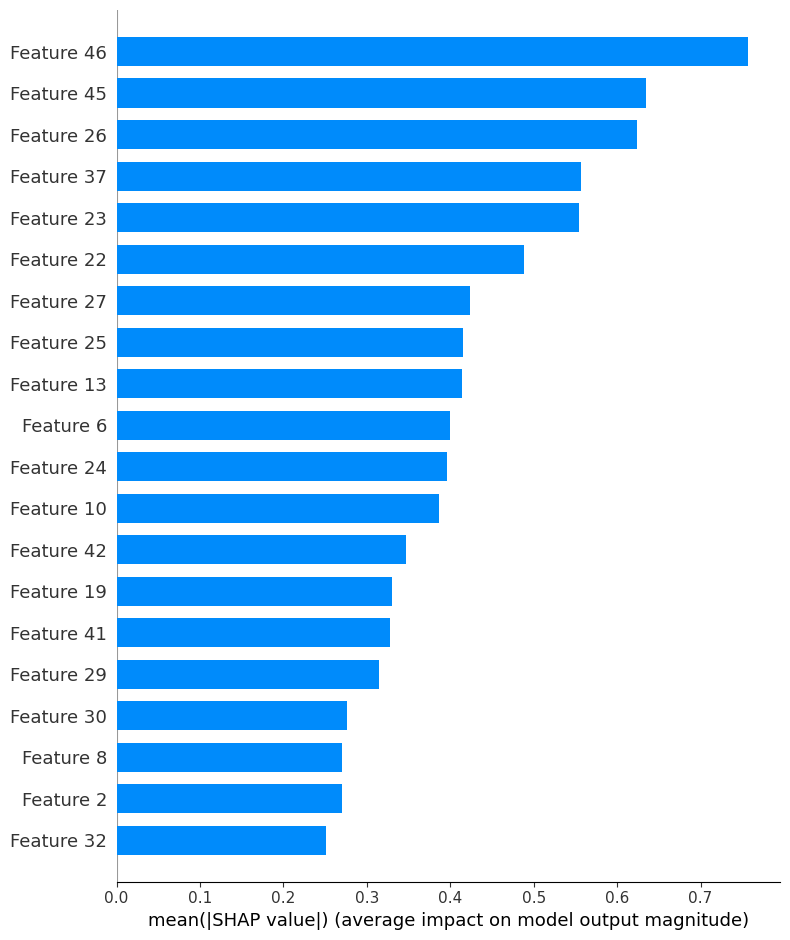

In [75]:
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")


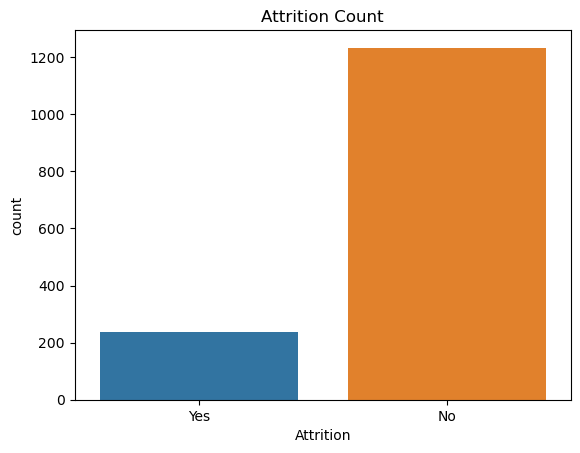

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Attrition', data=df)
plt.title("Attrition Count")
plt.show()


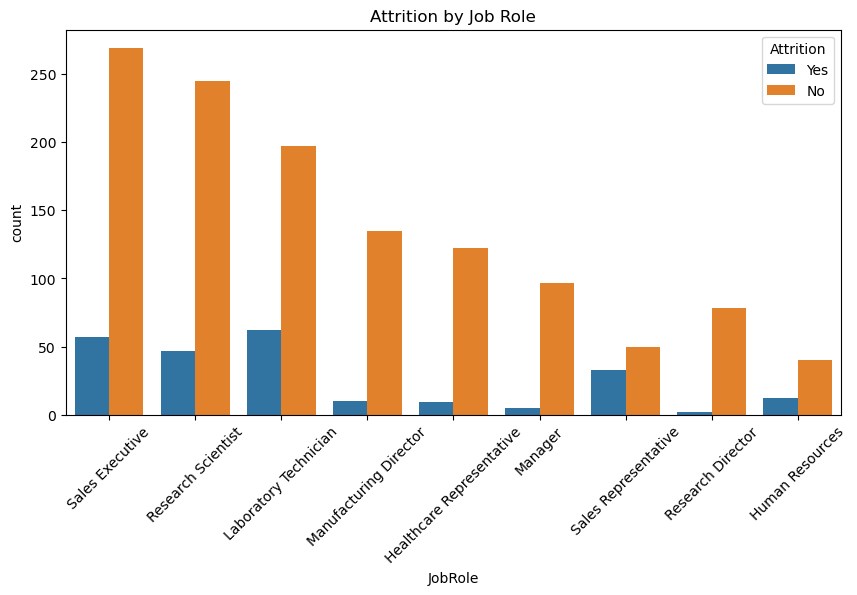

In [77]:
plt.figure(figsize=(10,5))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title("Attrition by Job Role")
plt.show()


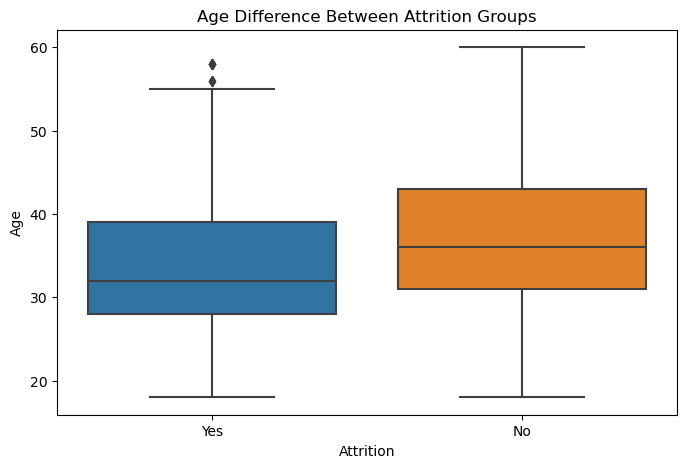

In [78]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Age Difference Between Attrition Groups")
plt.show()


C:\Users\Pallavi H S\AppData\Local\Temp\ipykernel_11672\2497674526.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="coolwarm", annot=False)


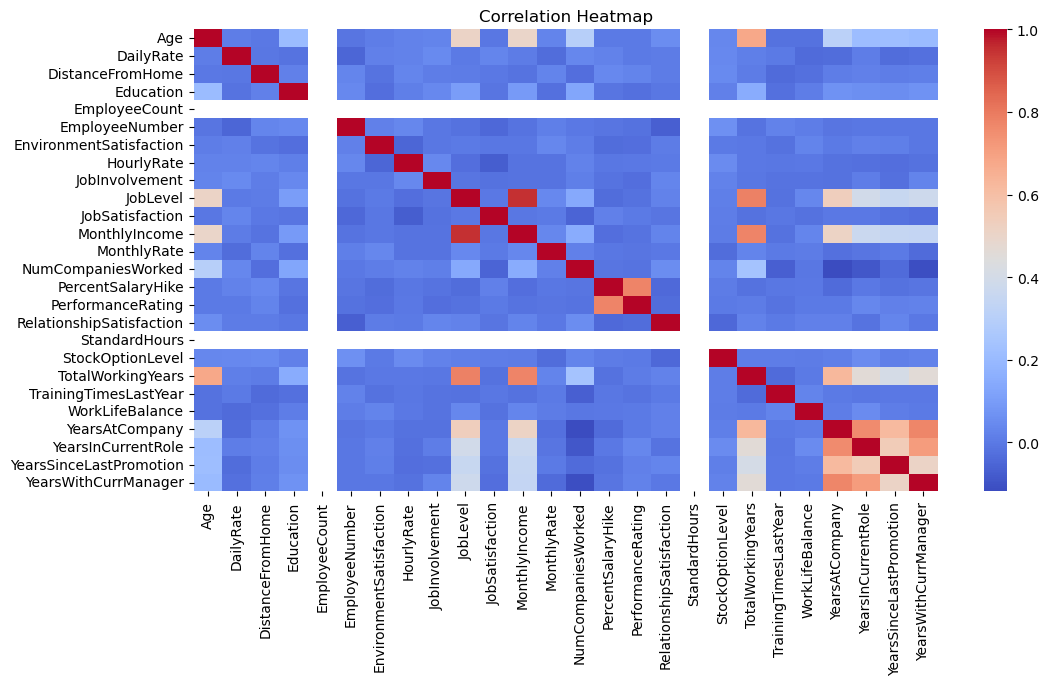

In [79]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()
